Summary Statistics:
               year    km_driven  selling_price
count  7309.000000  7309.000000    7309.000000
mean      0.827779     0.010638       0.014836
std       0.093797     0.005935       0.008535
min       0.578947     0.000000       0.000000
25%       0.763158     0.005871       0.008675
50%       0.842105     0.010028       0.013087
75%       0.894737     0.014545       0.018800
max       1.000000     0.027819       0.042282

Median:
 year                   0.842105
km_driven              0.010028
selling_price          0.013087
fuel_Diesel            0.000000
fuel_Electric          0.000000
fuel_Lpg               0.000000
fuel_Petrol            1.000000
owner_1st Owner        1.000000
owner_2nd Owner        0.000000
owner_3rd Owner        0.000000
owner_4th Owner        0.000000
owner_5th Owner        0.000000
City_chennai_cars      0.000000
City_delhi_cars        0.000000
City_hyderabad_cars    0.000000
City_jaipur_cars       0.000000
City_kolkata_cars      0.000000
dt

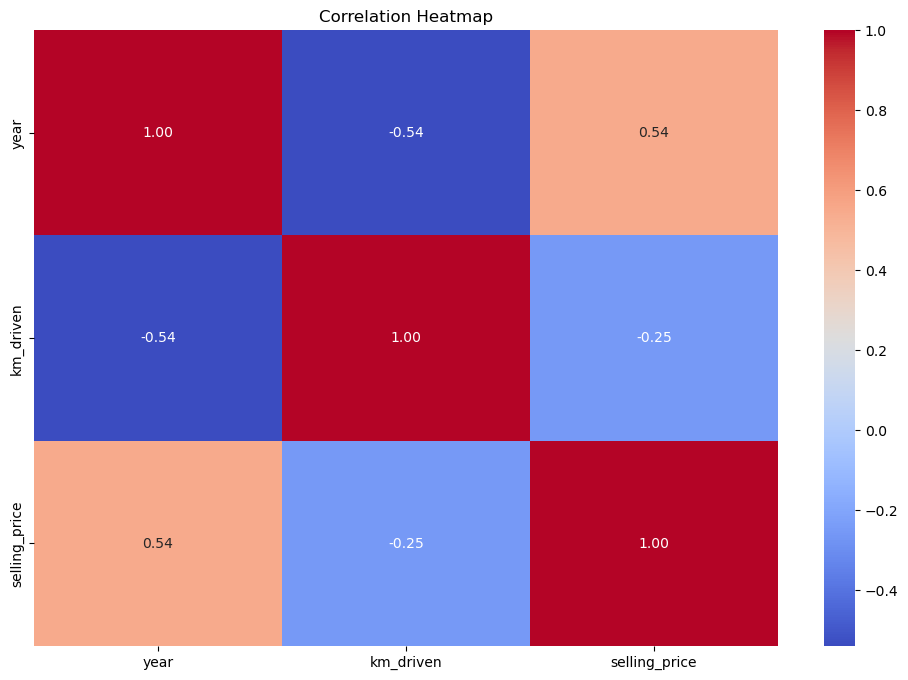

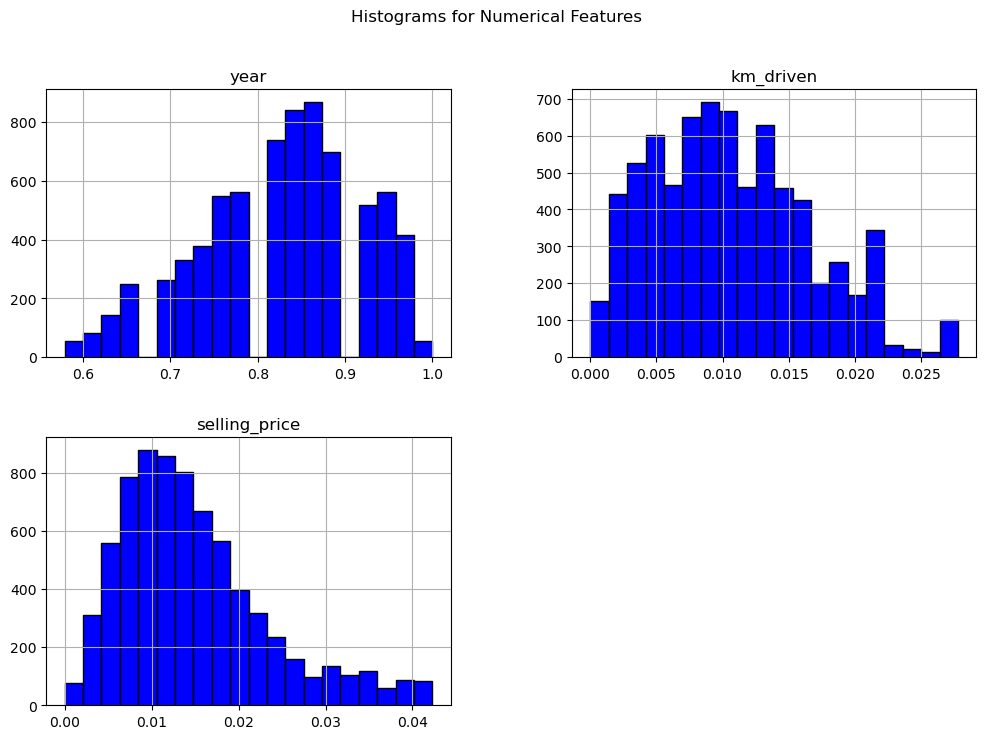

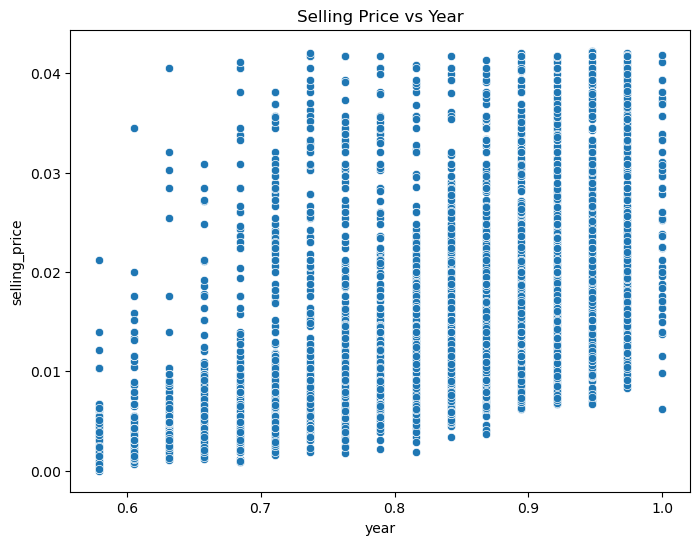

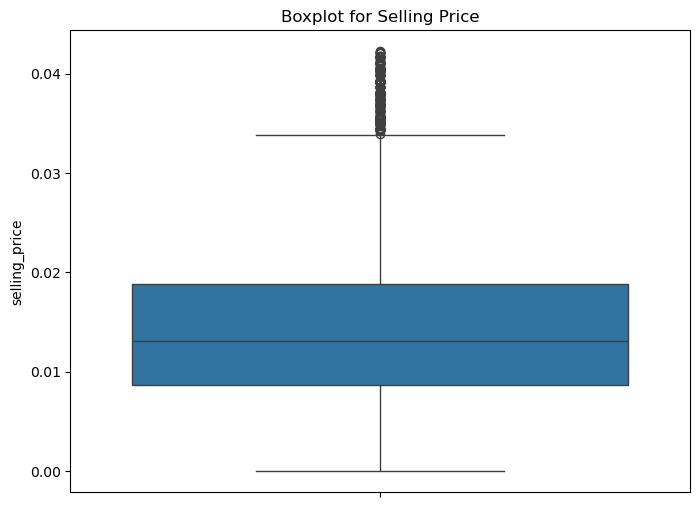

Feature Importances:
     Feature  Importance
1  km_driven    0.565037
0       year    0.434963


In [ ]:
import pandas as pd
import glob
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

file_path = r'C:\Users\spt909\Documents\Guvi\Project 3\preprocessed_data.xlsx'  # Replace with your actual file path
final_df = pd.read_excel(file_path)
# Step 1: Descriptive Statistics
def descriptive_statistics(df):
    # Summary statistics for numerical columns
    stats = df.describe()
    print("Summary Statistics:\n", stats)

    # Median
    medians = df.median(numeric_only=True)
    print("\nMedian:\n", medians)

    # Mode
    modes = df.mode(numeric_only=True).iloc[0]
    print("\nMode:\n", modes)

    # Standard Deviation
    std_devs = df.std(numeric_only=True)
    print("\nStandard Deviation:\n", std_devs)

    return stats, medians, modes, std_devs


# Step 2: Data Visualization
def data_visualization(df):
    # Correlation Heatmap
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

    # Histograms for numerical features
    df.hist(bins=20, figsize=(12, 8), color='blue', edgecolor='black')
    plt.suptitle("Histograms for Numerical Features")
    plt.show()

    # Scatter Plot of Selling Price vs. Year
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='year', y='selling_price', data=df)
    plt.title("Selling Price vs Year")
    plt.show()

    # Boxplot for Selling Price
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df['selling_price'])
    plt.title("Boxplot for Selling Price")
    plt.show()


# Step 3: Feature Selection
def feature_selection(df, target_column):
    # Ensure that the DataFrame only contains numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Separate features (X) and the target variable (y)
    X = numeric_df.drop(columns=[target_column])
    y = numeric_df[target_column]
    
    # Perform a train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importances from the model
    feature_importances = model.feature_importances_
    
    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importances:")
    print(feature_importance_df)
    
    return feature_importance_df

# Step 4: Apply Descriptive Statistics, Visualizations, and Feature Selection
stats, medians, modes, std_devs = descriptive_statistics(final_df)

data_visualization(final_df)

# Assuming 'selling_price' is the target column
feature_selection(final_df, 'selling_price')

# Export results to Excel
final_df.to_excel(r'C:\Users\spt909\Documents\Guvi\Project 3/final_statistics_data.xlsx', index=False)